In this activity, you are going to simulate the disk of Andromeda! 

Begin, as before, by importing the key programs. "fakedisk" is the program that will generate the simulated disk--matplotlib and numpy should be familar to you at this point.

In [1]:
from fakedisk import fakedisk
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

The following routine makes a plot of the simulated disk. Run this cell.

In [3]:
def show_map(sim, quantity, label, vmin=-200, vmax=200, cutout=False): 
    ax = plt.axes(aspect = 'equal')
    
    ax.set_xlabel('xi (kpc)')
    ax.set_ylabel('eta (kpc)')
    ax.set_title('Simulation')
    ax.set_xlim(1.2 * max(sim.x), 1.2 * min(sim.x))

    if cutout:
        #clip into "mystery cutout" 
        sideL  = 0.25 * sim.scaleFactor
        ax.set_xlim(sideL, -sideL)
        ax.set_ylim(-sideL, sideL)
        
    tt = ax.scatter(sim.x, sim.z, c=quantity, edgecolors='none', s=2, vmin=vmin, vmax=vmax)

    plt.colorbar(tt, label = label)

Now, we'd like to create our fake disk! This occurs below when the program "fakedisk" is called. 

In [44]:
scale_factor = 20. #Scale length of the disk
dispersion = 0.    #Dispersion in the layer hoe similar or not similar the galaxies are
incl=70. #Inclination-- clock face 90 to us
pa0=50 #Position Angle-- tilt in tghe plane of the galaxy clock face flat on to us
vrot=200. #rotation velocity
n=30000 #number of particles
sim = fakedisk(N=n, incl=incl, pa0=pa0, v=vrot, scaleFactor=scale_factor, shape='constant',
               dispersion=dispersion)

Generate plots of your simulated velocity field below. 

Once you've made these plots, go back and change the following parameters to see what they mean. What happens when you change the scale factor? The dispersion? The inclination? The position angle? N? Can you guess what these different parameters are referring to? 

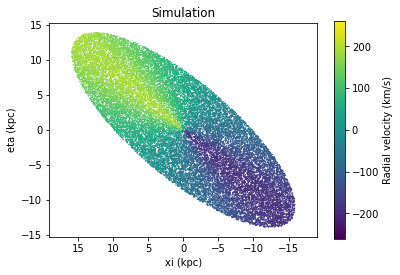

In [45]:
#Generate velocity map
vmax = 1.3 * sim.vrot
show_map(sim, sim.vy, 'Radial velocity (km/s)', vmin=-vmax, vmax=vmax)

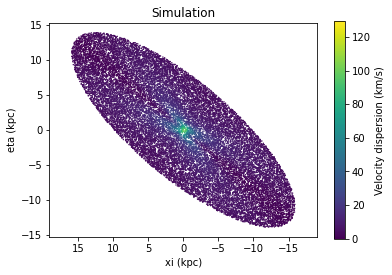

In [46]:
#Generate dispersion map using 200'' smoothing circle.
arcsec2kpc = (13.67/3600.) #conversion factor
sigma = np.zeros(len(sim.x))
sig_sv = np.zeros(len(sim.x))
smoothingCircle = 200. * arcsec2kpc
for i in range(len(sigma)):
    sigma[i], sig_sv[i] = sim.get_sv(i, smoothingCircle)
show_map(sim, sigma, 'Velocity dispersion (km/s)', vmin=0, vmax=1.3*np.max(sigma))

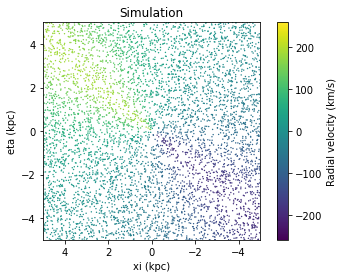

In [47]:
#Also generate a little square cutout velocity map.
vmax = 1.3 * sim.vrot
show_map(sim, sim.vy, 'Radial velocity (km/s)', vmin=-vmax, vmax=vmax, cutout=True)

Now that you're familiar with the parameters and the figures, change the parameters for fakedisk to answer the following questions (feel free to double click on this cell and type your answers below the questions):

1) If galaxies A and B have the same geometry, but galaxy A has twice the rotation speed of galaxy B, how do the velocity fields differ on the major axis? On the minor axis? In between?

2) If galaxies C and D have the same PA and rotation speed, but galaxy C has an inclination half that of D, how do the velocity fields differ?

3) If galaxies E and F have the same inclination and rotation speed, but galaxy E’s major axis position angle is the negative of galaxy F’s, how do the velocity fields differ?



What PA, inclination, velocity, and/or disk radius would make it easiest to study the properties of a real galaxy? What parameters most closely reproduce M31‘s velocity map that you made last time?